# Publication Visuals

This notebook produces draft and final visuals for use in the technical note.

#### Color Palette
```
#409acb // background 0
#fe8266 // monoculture 1
#8edc86 // agroforestry 2
#1c5718  // natural 3
```

### S2 histograms for Pub
Goal is to illustrate the spectral signature of the different land use classes, with two types of agroforestry that show radically different signatures.

Potential tiles:
-  (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry' - illustrate two AF plots with quite different signatures, find out what type of agroforestry

Monoculture: (1658, 1063), (1658, 1064)  
Natural: (1654, 1065), (1653, 1065), (1658,1072), (1677, 1098)- sparse wetland area in northern pd_east, (1649, 1130)- northern parkland  
Cocoa agroforestry: (1646, 1082), (1648, 1083)
Shea tree: (1660, 1128), (1661, 1128),

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sys
import numpy as np
import pandas as pd
sys.path.append('../../src/')
import utils.quick_viz as make
%load_ext autoreload
%autoreload 2

color_dict = {
    'monoculture': '#fe6742',
    'agroforestry': '#72dc68',
    'natural': '#174814',
}

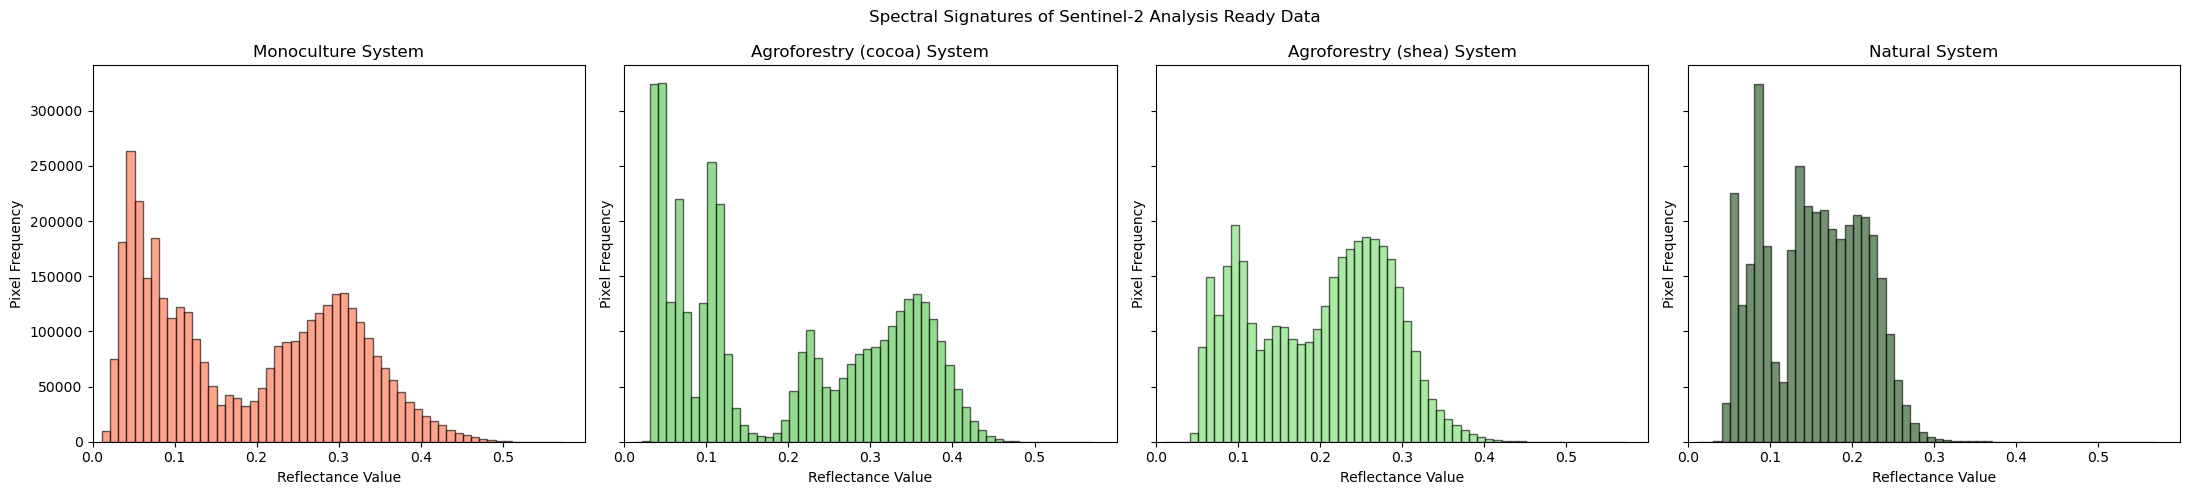

In [9]:
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1648, 1083), #cocoa
                     (1660, 1128), #shea
                     #(1654, 1065), 
                     (1649, 1130), # parkland
                     'Spectral Signatures of Sentinel-2 Analysis Ready Data',
                     color_dict,
                     output_file='../../data/figures/s2_hist_avg_updated.png'
                         )

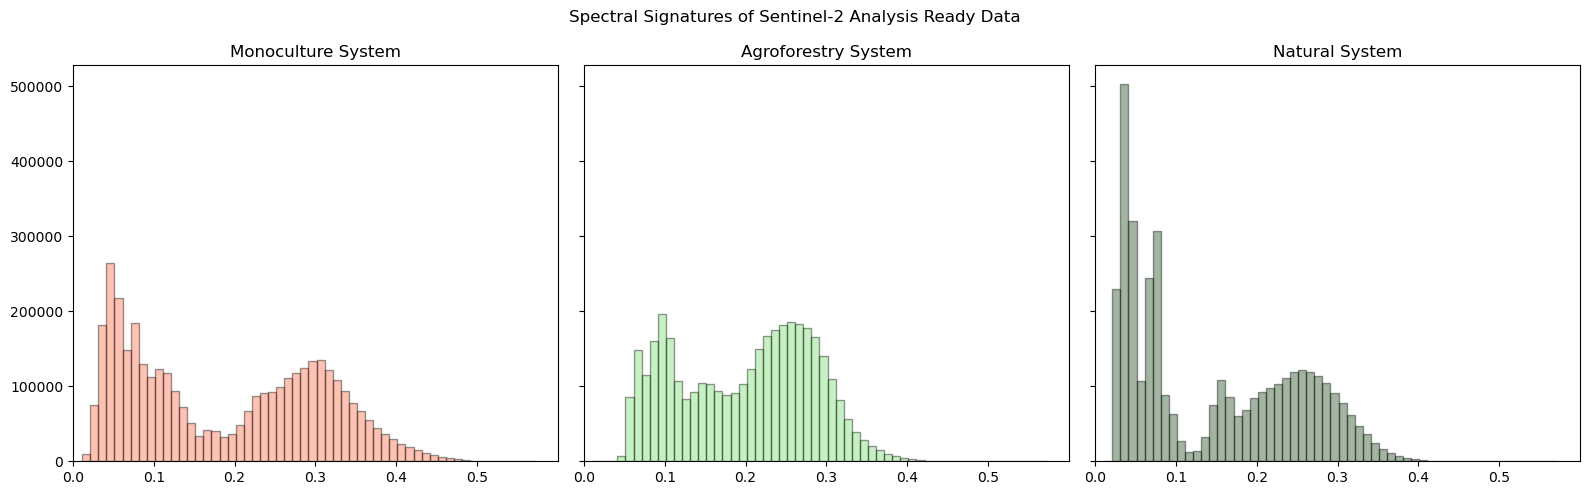

In [32]:
# this one uses shea
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1660, 1128), 
                     (1654, 1065), 
                     'Spectral Signatures of Sentinel-2 Analysis Ready Data',
                      color_dict)

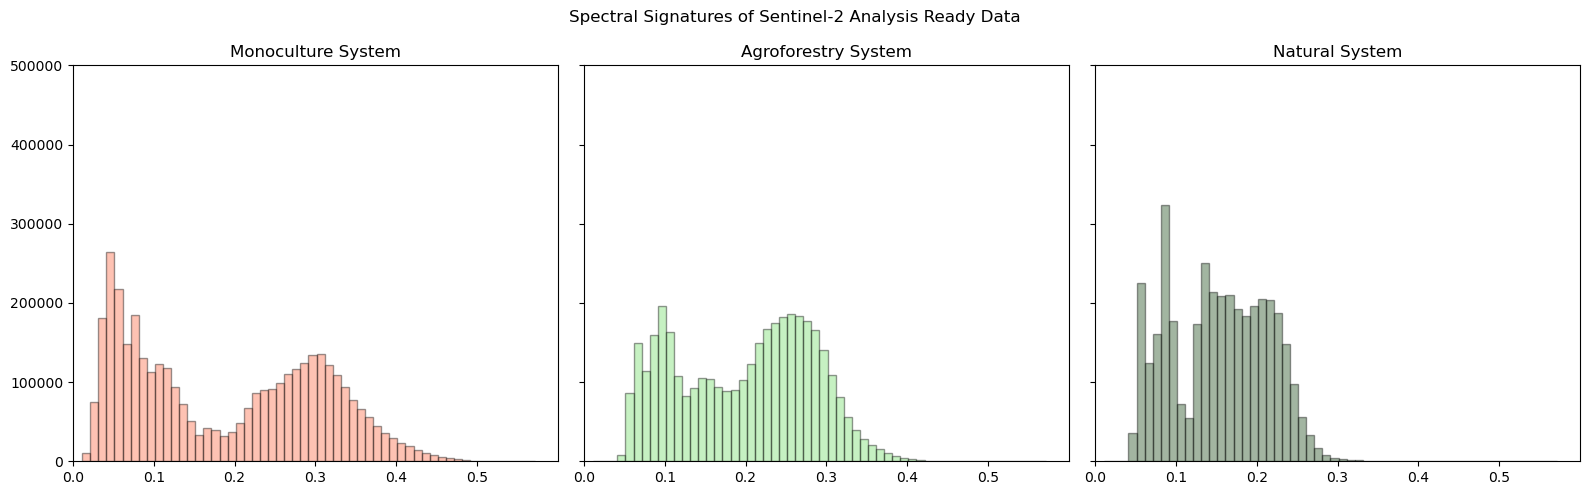

In [38]:
# this one looks at natural parkland system -- much more similar to shea
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1660, 1128), 
                     (1649, 1130), 
                     'Spectral Signatures of Sentinel-2 Analysis Ready Data',
                      color_dict)


## Other experiments

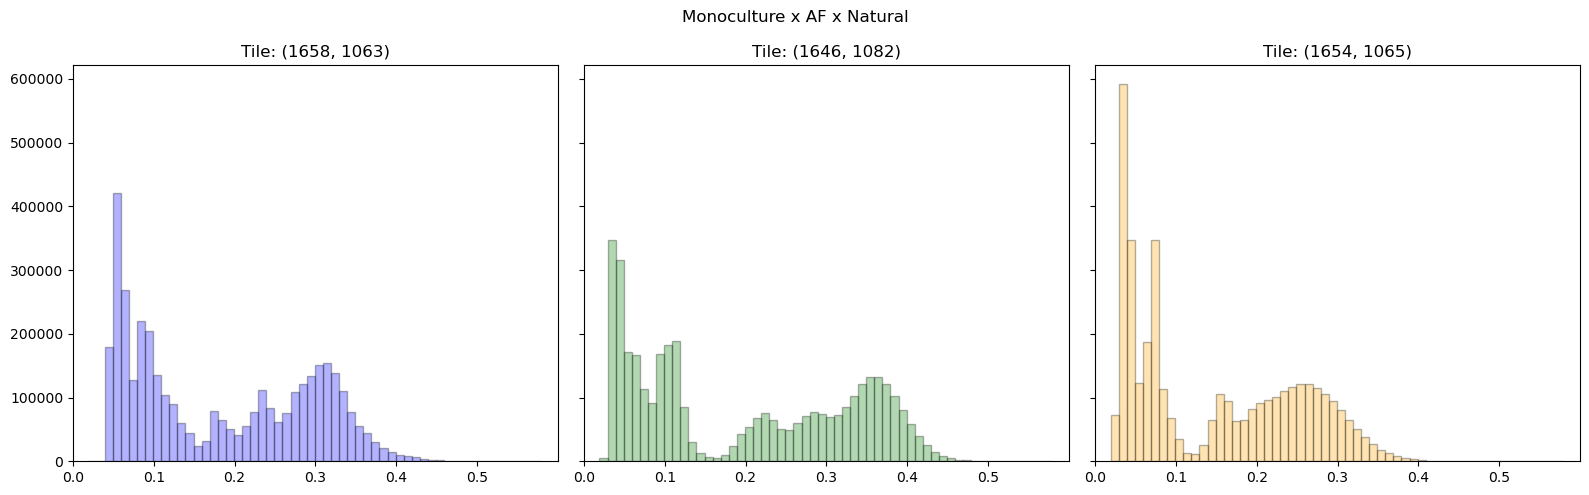

In [21]:
make.hist_individual_tile('ghana', 
                     (1658, 1063),
                     (1646, 1082), 
                     (1654, 1065), 
                     'Monoculture x AF x Natural')

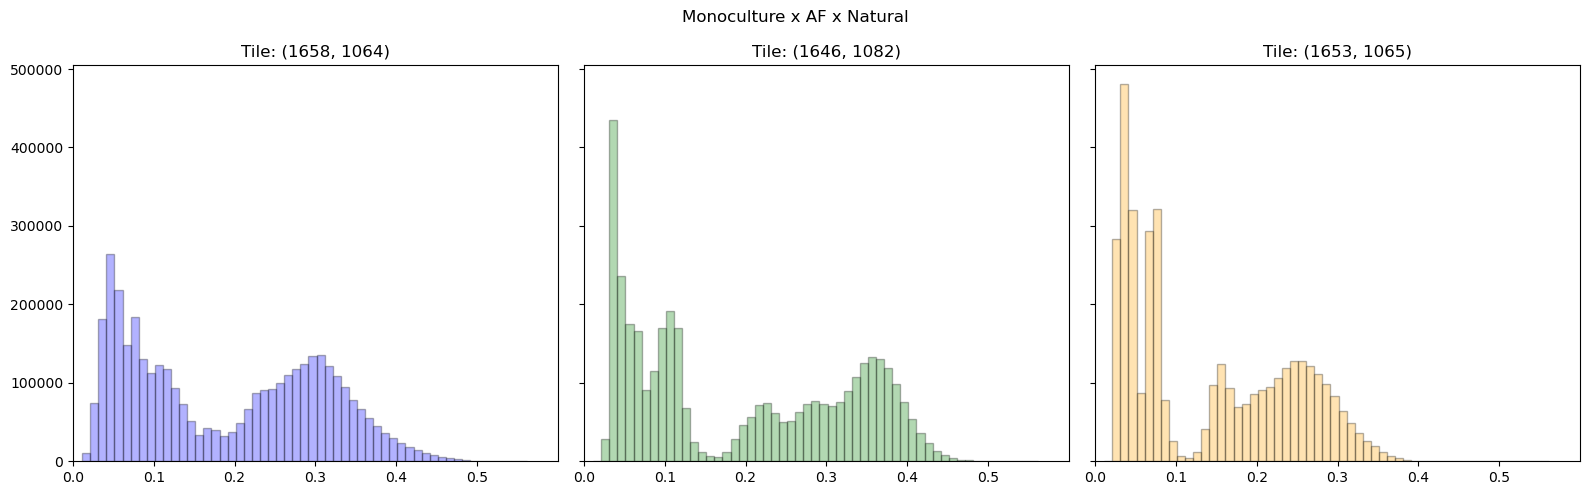

In [17]:
#This monoculture is better, but natural is worse (includes more AF system)
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1646, 1082), 
                     (1653, 1065), 
                     'Monoculture x AF x Natural')

## Vertical Stacked Barchart

/var/folders/1v/8qs7l7157sddx1_9z9wqldrc0000gp/T/ipykernel_94034/3802395651.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.district, rotation=55, ha="right")


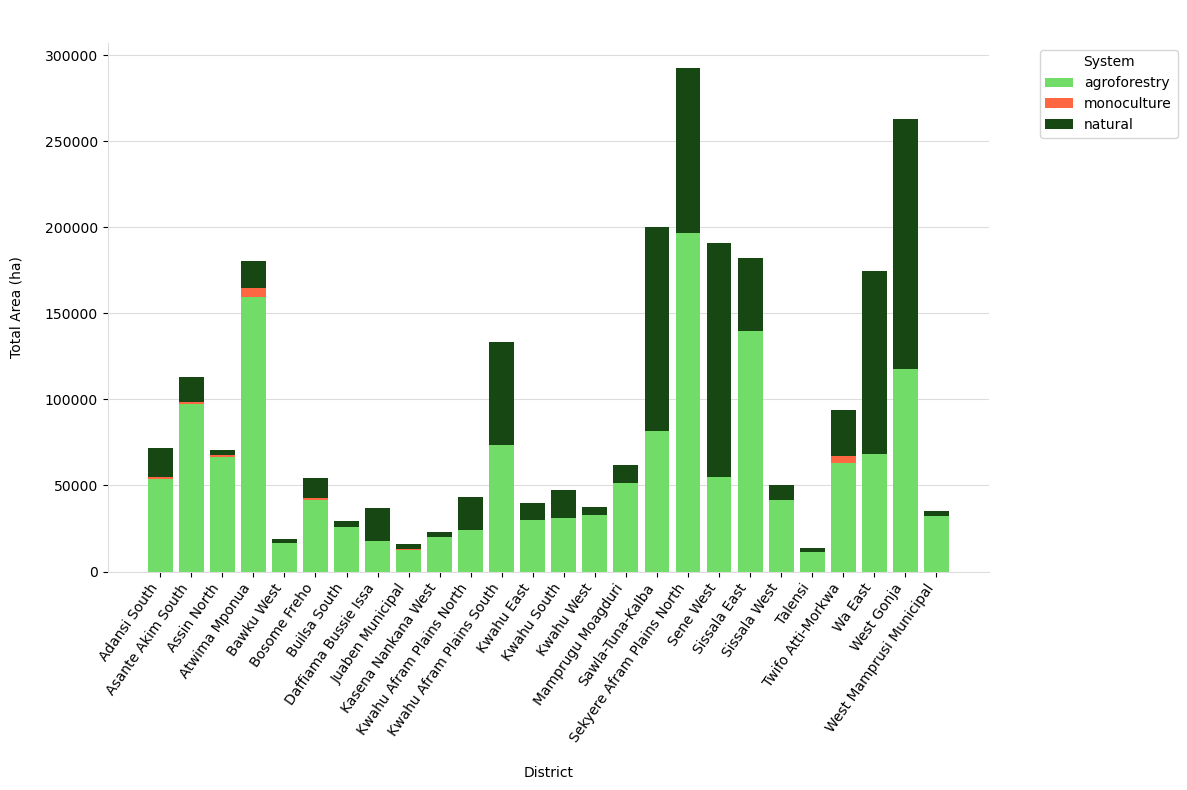

In [29]:
df = pd.read_csv('../../data/area_assessment.csv')

categories = ['agroforestry', 'monoculture', 'natural']

# Generate the plot
make.vertical_stacked_bar(
    df=df.drop(columns=['no_data']),  # Exclude no_data column
    title=" ",
    color_dict=color_dict,
    categories=categories,
    output_file='../../data/figures/stacked_bar.png'
)

## Horizontal 100% Stacked Barchart

/var/folders/1v/8qs7l7157sddx1_9z9wqldrc0000gp/T/ipykernel_48501/1999014718.py:29: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(ygrid, color=grid_color)


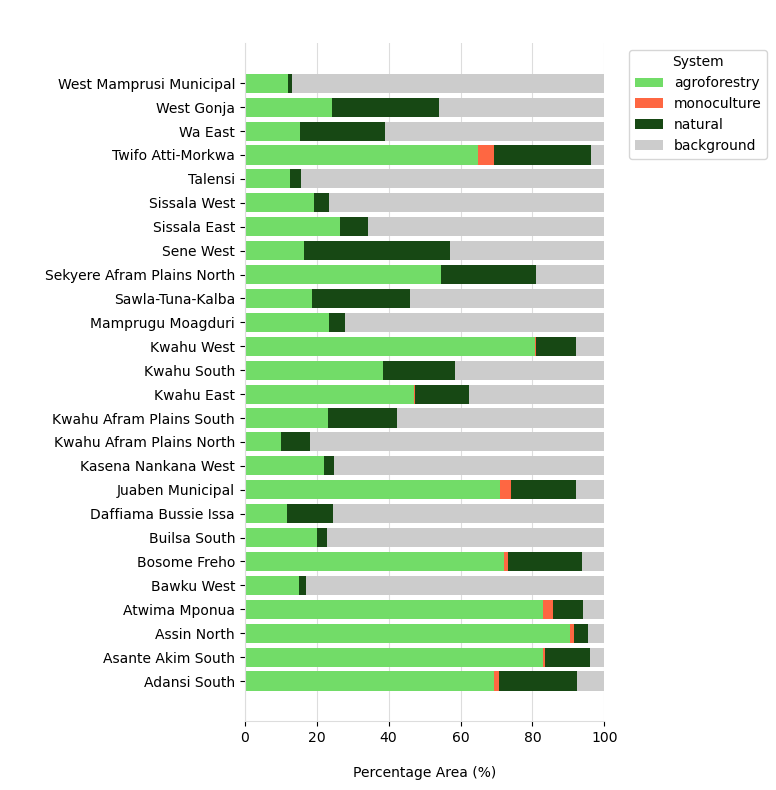

In [4]:
df = pd.read_csv('../../data/area_assessment.csv')
df = df.rename(columns={'no_tree':'background'})

categories = ['agroforestry', 'monoculture', 'natural', 'background']

# Generate the plot
make.horizontal_stacked_bar(
    df=df.drop(columns=['no_data']),  # Exclude no_data column
    title=" ",
    color_dict=color_dict,
    categories=categories,
    output_file='../../data/figures/h_stacked_bar.png'
)

In [14]:
df.head()

,region,district,Monoculture,Agroforestry,Natural
0,east,Adansi South,3300.0,40730.0,13190.0
1,east,Twifo Atti-Morkwa,12990.0,47810.0,20910.0
2,east,Sene West,200.0,41390.0,107820.0
3,east,Sekyere Afram Plains North,450.0,148880.0,75910.0
4,east,Kwahu West,480.0,24940.0,3620.0


### Eastern districts

/Users/jessica.ertel/github/plantation_classifier/notebooks/analyses/../../src/utils/quick_viz.py:696: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(xgrid,color=grid_color)


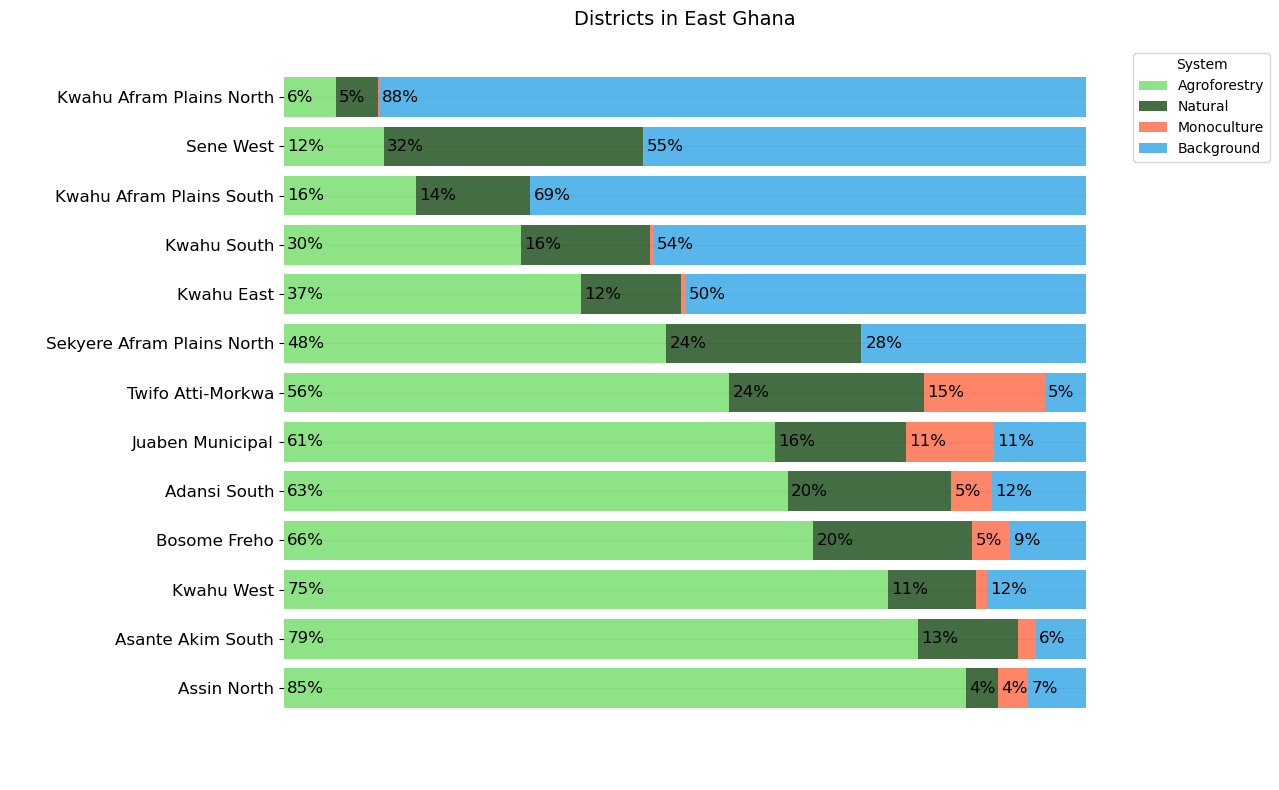

In [35]:
df = pd.read_csv('../../data/adj_area_assessment_pubfigure_070325.csv')
# Generate the plot
make.horizontal_stacked_bar(df,
    region='east',
    color_dict= {
    'Monoculture': '#fe6742',
    'Agroforestry': '#72dc68',
    'Natural': '#174814',
    'Background': '#2fa4e7',
    },
    sort_by='Agroforestry',
    output_file='../../data/figures/h_stacked_bar_east.png',
    alpha=.8,
)

### Western districts

/Users/jessica.ertel/github/plantation_classifier/notebooks/analyses/../../src/utils/quick_viz.py:696: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(xgrid,color=grid_color)
/Users/jessica.ertel/github/plantation_classifier/notebooks/analyses/../../src/utils/quick_viz.py:786: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  def vertical_stacked_bar(df: pd.DataFrame,


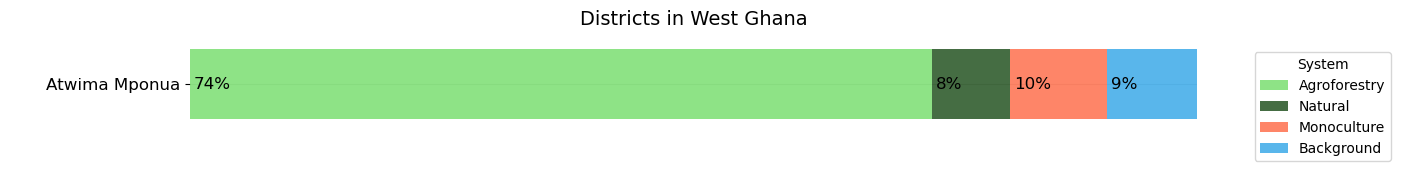

In [37]:
make.horizontal_stacked_bar(df,
    region='west',
    color_dict= {
    'Monoculture': '#fe6742',
    'Agroforestry': '#72dc68',
    'Natural': '#174814',
    'Background': '#2fa4e7',
    },
    sort_by='Agroforestry',
    output_file='../../data/figures/h_stacked_bar_west.png',
    alpha=.8,
    figsize=(13,1)
)

### Northern Districts

/Users/jessica.ertel/github/plantation_classifier/notebooks/analyses/../../src/utils/quick_viz.py:696: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(xgrid,color=grid_color)


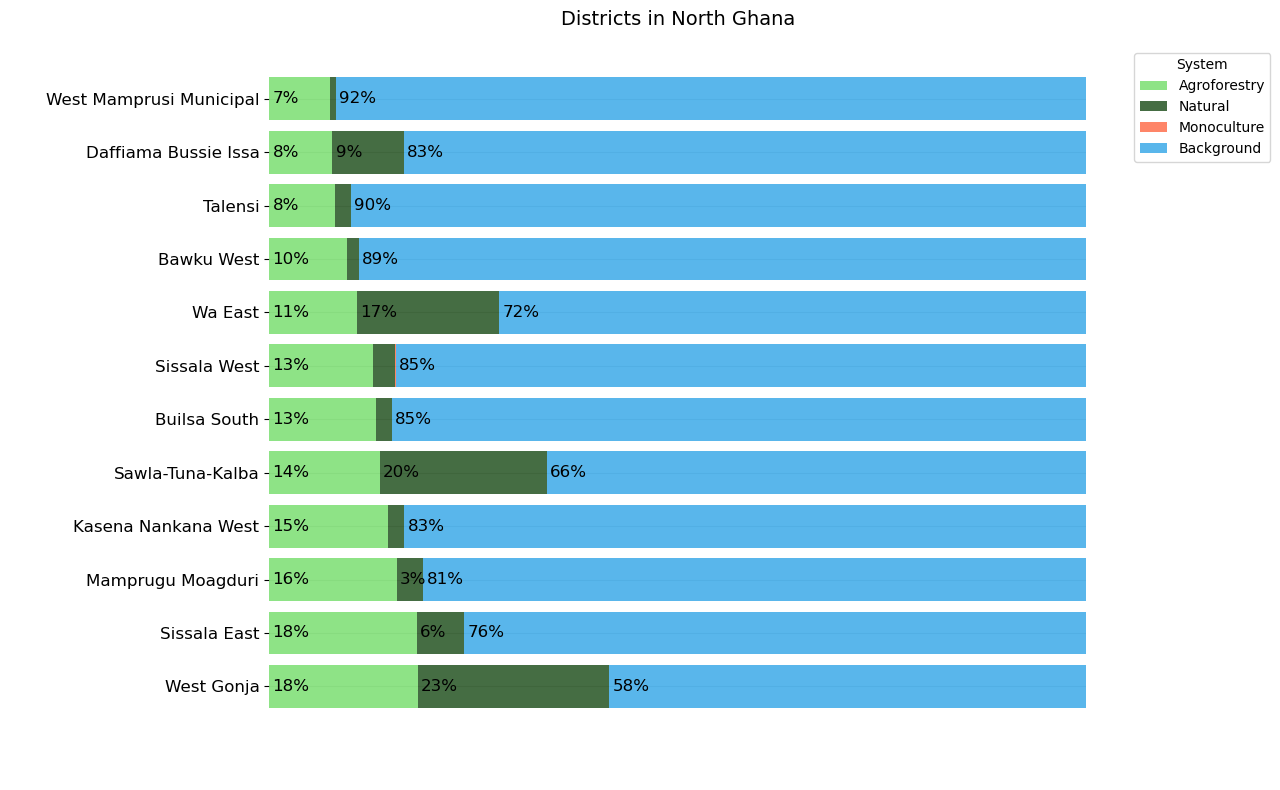

In [36]:
make.horizontal_stacked_bar(df,
    region='north',
    color_dict= {
    'Monoculture': '#fe6742',
    'Agroforestry': '#72dc68',
    'Natural': '#174814',
    'Background': '#2fa4e7',
    },
    sort_by='Agroforestry',
    output_file='../../data/figures/h_stacked_bar_north.png',
    alpha=.8,
)

In [7]:
# calculate totals for results section
adj = pd.read_csv('../../data/adj_area_assessment_042125.csv')
adj.sum()

No vegetation                                            3544545.0
Monoculture                                                42773.0
Agroforestry                                             1183273.0
Natural                                                   711900.0
No data                                                 4646938.74
district         Adansi SouthAsante Akim SouthAssin NorthAtwima...
dtype: object

## Learning Curve Comparison

In [5]:
## need to figure out how to create inputs in order to run this
# import create_xy from src/features 
# includes texture 78: is texture
df = pd.read_csv('../../data/cleanlab/cleanlab_demo3.csv')

X_train_full = df.iloc[:179728, 0:78]
X_train_drop_ttc = df.iloc[:179728, 0:13]
y_train = df.iloc[:179728, -1:]
X_train_full.shape, X_train_drop_ttc.shape, y_train.shape

((179728, 78), (179728, 13), (179728, 1))

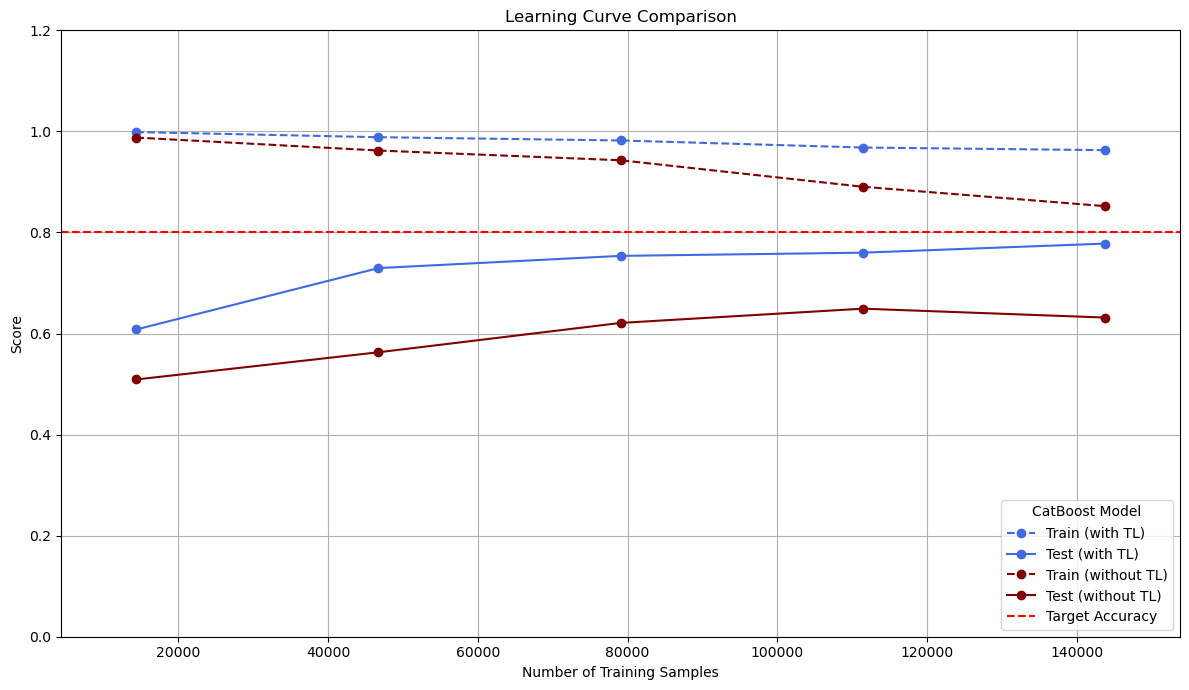

<Figure size 640x480 with 0 Axes>

In [8]:
make.learning_curve_catboost(X_train_full,
                            X_train_drop_ttc,
                            y_train,
                            output_file='../../data/figures/learning_curve.png')

## Hist of Multiple Tiles
Overlay 2 or more sentinel tiles comprised of a majority land use.

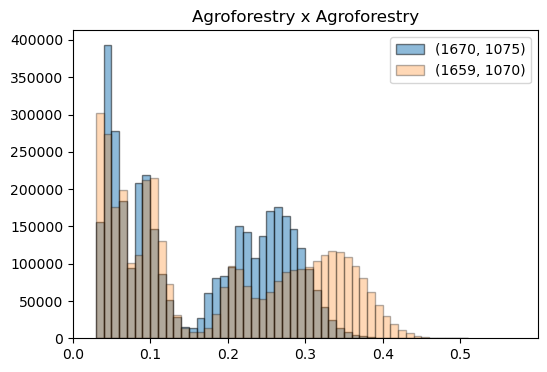

In [14]:
make.hist_compare_s2('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

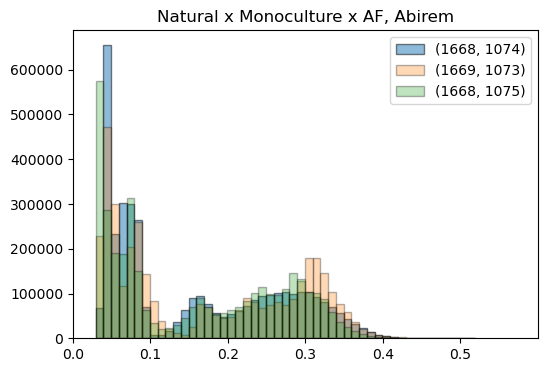

In [3]:
make.hist_compare_s2('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

In [45]:
# the tile for abirem is agroforestry w some smallholder oil palm
# the tile for pd_southeast is a natural forest misclassified as agroforestry
#make.hist_compare_s2('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

In [42]:
#make.hist_compare_s2_byband('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

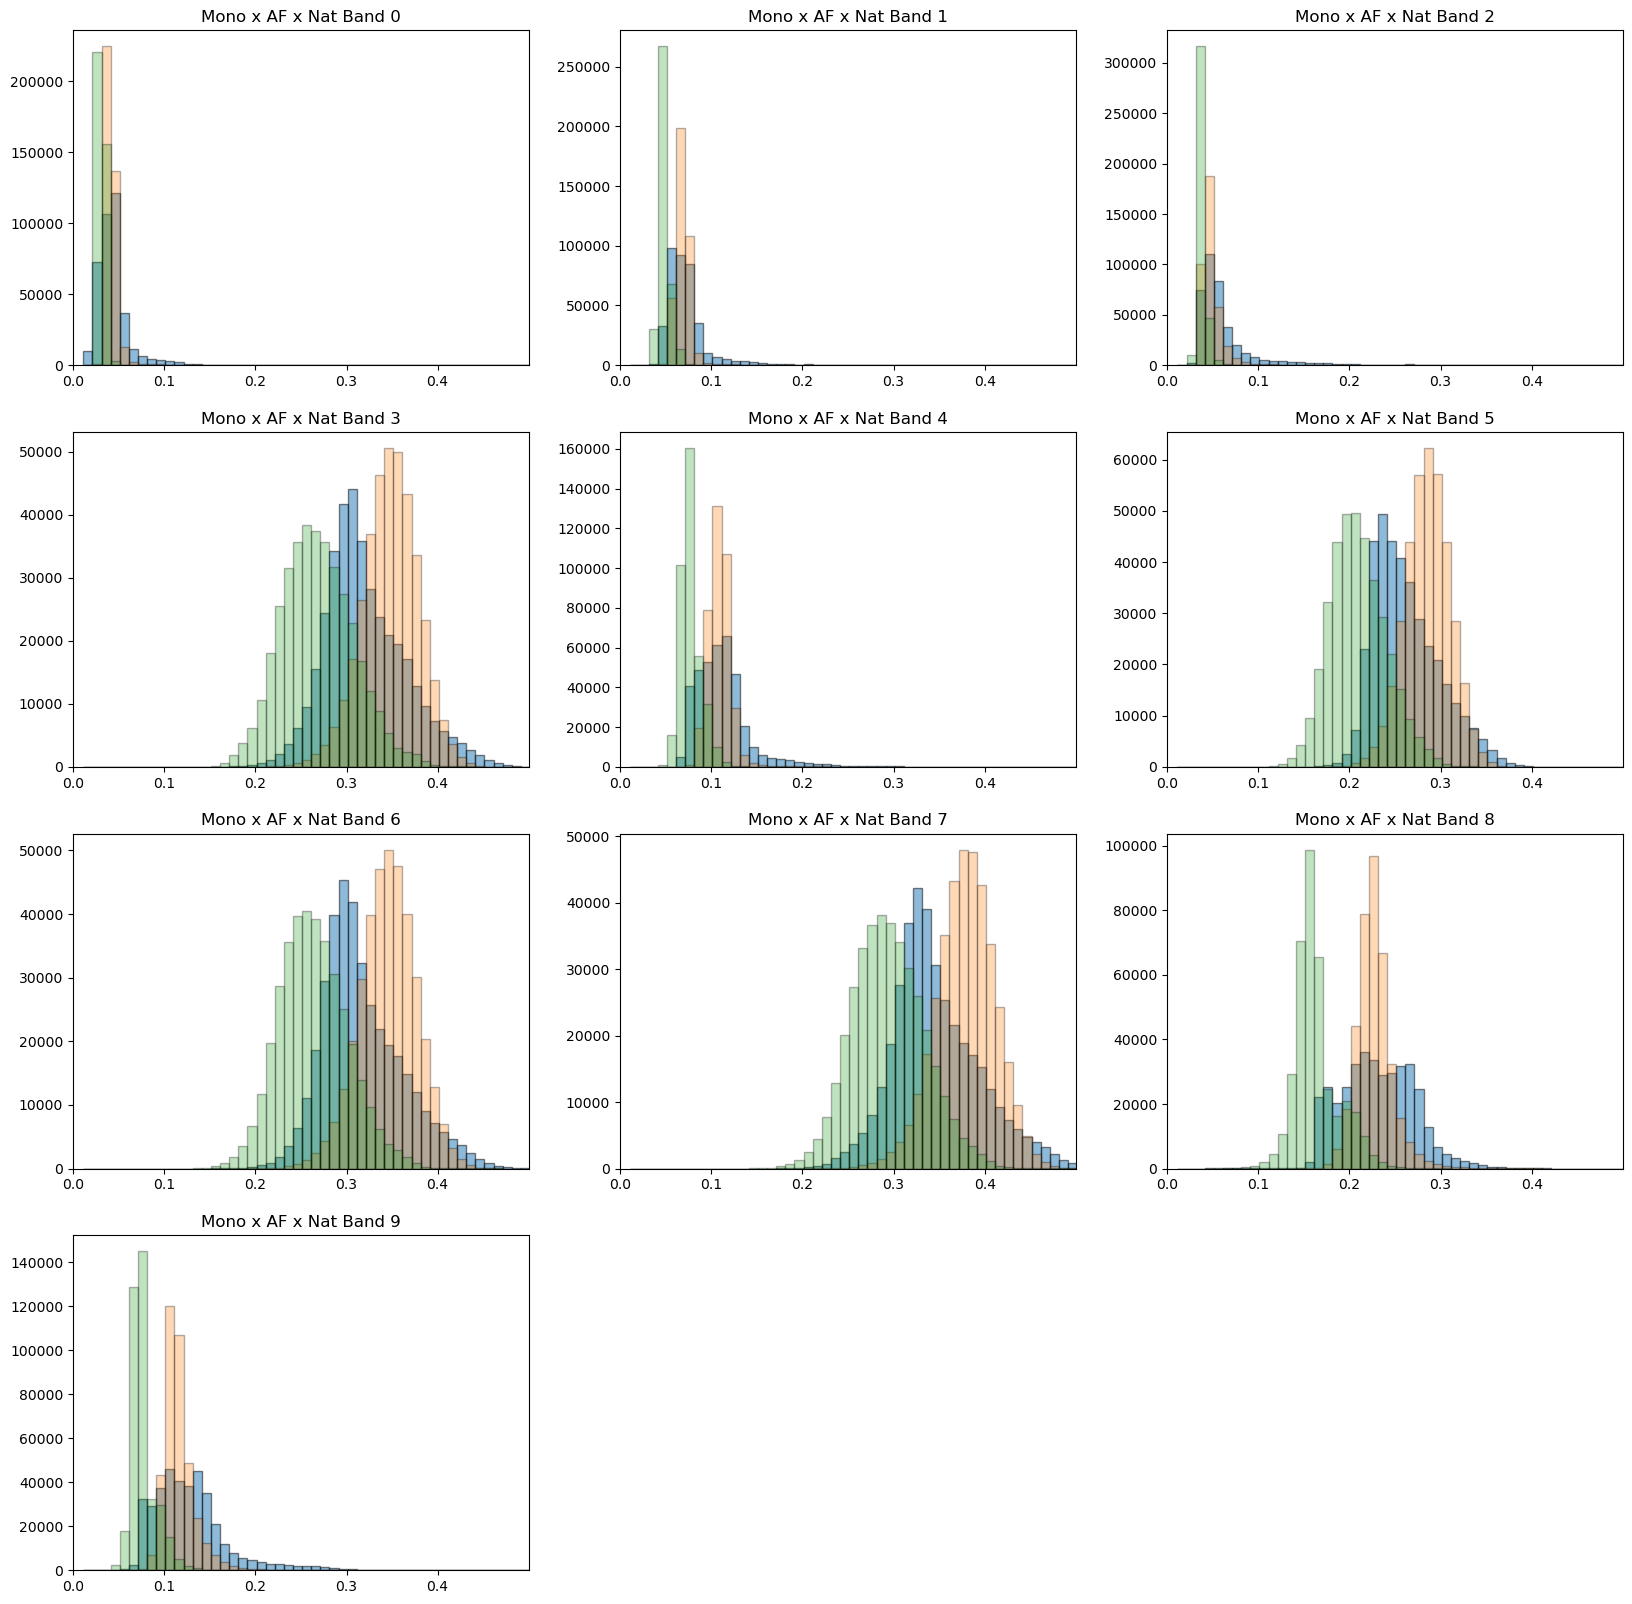

In [5]:
# (1658, 1064),
# (1648, 1083), 
# (1654, 1065)

make.hist_compare_s2_byband('ghana', (1658, 1064), (1648, 1083), 'Mono x AF x Nat', (1654, 1065));   